# DRAFT

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Read CSV file

In [2]:
df = pd.read_csv('all_entriess.csv')
df

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_area,num_facade,swimmingpool
0,5000,HOUSE,HOUSE,159000.0,1900.0,GOOD,Regular,3.0,106.0,INSTALLED,False,False,NaN,NaN,NaN,NaN,40.0,2.0,False
1,4430,HOUSE,HOUSE,159000.0,1899.0,GOOD,Regular,2.0,122.0,SEMI_EQUIPPED,False,False,True,20.0,True,171.0,335.0,2.0,False
2,9000,HOUSE,HOUSE,345000.0,1941.0,GOOD,Regular,4.0,119.0,USA_INSTALLED,False,False,NaN,NaN,NaN,NaN,49.0,2.0,False
3,1150,HOUSE,VILLA,895000.0,1961.0,TO_RENOVATE,Regular,3.0,200.0,INSTALLED,NaN,False,True,12.0,True,200.0,300.0,3.0,False
4,1570,HOUSE,VILLA,570000.0,1989.0,AS_NEW,Regular,4.0,404.0,HYPER_EQUIPPED,False,False,True,52.0,True,1000.0,1000.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,2630,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,Regular,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11312,2970,HOUSE,HOUSE,359000.0,1961.0,TO_RENOVATE,Regular,4.0,170.0,NaN,NaN,False,NaN,NaN,True,NaN,650.0,4.0,NaN
11313,1000,APARTMENT,APARTMENT,465000.0,1914.0,AS_NEW,Regular,2.0,138.0,HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN
11314,8570,APARTMENT,APARTMENT,247220.0,2023.0,NaN,Regular,2.0,85.0,NaN,False,False,True,26.0,NaN,NaN,NaN,3.0,False


In [5]:
df.shape

(11316, 19)

In [3]:
df.columns

Index(['post_code', 'type_of_property', 'subtype', 'price',
       'construction_year', 'state', 'type_of_sale', 'bedrooms_count',
       'habitable_surface', 'kitchen_type', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_area',
       'num_facade', 'swimmingpool'],
      dtype='object')

## Clean data
- No duplicates
- No blank spaces (ex: " I love python " => "I love python")
- No errors
- No empty values

In [115]:
# clean dataset of property types that have null values for all columns
df = df.loc[df['type_of_property'] != 'APARTMENT_GROUP']
df = df.loc[df['type_of_property'] != 'HOUSE_GROUP']
df.shape

(8610, 24)

In [26]:
# count nbr of duplicates
df.duplicated().sum()

2206

In [27]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(8614, 19)

In [36]:
# check how many rows have price is null
df[df['price'].isnull()].shape

(4, 19)

In [38]:
# filter out rows where price is null
df = df[df['price'].notnull()]
df.shape

(8610, 19)

In [91]:
# to check final dataset!
df['type_of_sale'].unique()

array(['Regular', 'Notary Sale'], dtype=object)

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
2482,6640,HOUSE,HOUSE,100000.0,1935.0,GOOD,Notary Sale,3.0,180.0,INSTALLED,...,True,486.0,706.0,3.0,NaN,1,0,2,0,555.555556
2819,1673,HOUSE,HOUSE,395000.0,1964.0,TO_BE_DONE_UP,Notary Sale,4.0,212.0,INSTALLED,...,True,NaN,1596.0,4.0,NaN,1,0,1,0,1863.207547
3003,6690,HOUSE,HOUSE,120000.0,1936.0,TO_BE_DONE_UP,Notary Sale,4.0,145.0,INSTALLED,...,True,521.0,521.0,4.0,NaN,1,0,1,0,827.586207
3012,6687,HOUSE,HOUSE,165000.0,1850.0,GOOD,Notary Sale,1.0,157.0,INSTALLED,...,NaN,NaN,900.0,4.0,NaN,1,0,2,0,1050.955414
3021,4020,HOUSE,HOUSE,190000.0,1953.0,TO_RENOVATE,Notary Sale,2.0,99.0,INSTALLED,...,True,77.0,177.0,2.0,NaN,1,0,0,0,1919.191919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,9000,APARTMENT,GROUND_FLOOR,400000.0,2011.0,NaN,Notary Sale,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,0,0,1,0,0.000000
10575,1090,APARTMENT,APARTMENT,65000.0,NaN,NaN,Notary Sale,1.0,NaN,INSTALLED,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0.000000
10579,8400,APARTMENT,APARTMENT,75000.0,NaN,NaN,Notary Sale,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0.000000
10583,3960,APARTMENT,APARTMENT,150000.0,2013.0,NaN,Notary Sale,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0.000000


## Data analysis

Answer the following questions with a vizualization if appropriate:
- How many rows and columns? (DONE)
- What is the correlation between the variables and the price? (Why might that be?) (DONE)
- How are variables correlated to each other? (Why?) (DONE)
- Which variables have the greatest influence on the price? (DONE)
- Which variables have the least influence on the price? (DONE)
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
- Percentage of missing values per column? (DONE)

In [178]:
# How many rows and colums?
df.shape

(8610, 24)

In [181]:
# Percentage of missing values per column?
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

post_code               0.000000
type_of_property        0.000000
subtype                 0.000000
price                   0.000000
construction_year      29.233449
state                  11.207898
type_of_sale            0.000000
bedrooms_count          0.000000
habitable_surface       6.387921
kitchen_type           15.865273
furnished              21.486643
fireplace               0.000000
terrace                27.293844
terrace_area           48.269454
garden                 65.331010
garden_area            72.497096
land_area              48.699187
num_facade             14.529617
swimmingpool           49.872242
kitchen_type_value      0.000000
furnished_value         0.000000
state_value             0.000000
swimming_pool_value     0.000000
price/m2                0.000000
dtype: float64

### Assigning values to qualitative data

In [40]:
def determine_kitchen_type_value(row):
    if row['kitchen_type'] == "NOT_INSTALLED" or row['kitchen_type'] == "USA_UNINSTALLED" or str(row['kitchen_type'])== "nan":
        return 0
    else:
        return 1

In [41]:
def determine_furnished_value(row):
    if str(row['furnished']) == "False" or str(row['furnished'])== "nan":
        return 0
    else:
        return 1

In [42]:
def determine_swimming_pool_value(row):
    if str(row['swimmingpool']) == "False" or str(row['swimmingpool'])== "nan":
        return 0
    else:
        return 1

In [43]:
def determine_state_value(row):
    if row['state'] == "TO_RENOVATE" or row['state'] == "TO_RESTORE":
        return 0
    elif row['state'] == "TO_BE_DONE_UP" or str(row['state']) == "nan":
        return 1
    elif row['state'] == "GOOD" or row['state'] == "JUST_RENOVATED":
        return 2
    else:
        return 3
"""
- state -> 'AS_NEW': 3,
        'JUST_RENOVATED': 2,
        'GOOD': 2,
        'TO_BE_DONE_UP':1,
        nan:1,
        'TO_RENOVATE': 0,
       'TO_RESTORE':0
       """

"\n- state -> 'AS_NEW': 3,\n        'JUST_RENOVATED': 2,\n        'GOOD': 2,\n        'TO_BE_DONE_UP':1,\n        nan:1,\n        'TO_RENOVATE': 0,\n       'TO_RESTORE':0\n       "

In [54]:
def price_per_square_meter(row):
    if str(row['habitable_surface']) == "nan":
        return 0
    else :
        return row['price'] / row['habitable_surface']

In [55]:
df["kitchen_type_value"] = df.apply(lambda row: determine_kitchen_type_value(row), axis=1)
df['furnished_value'] = df.apply(lambda row: determine_furnished_value(row), axis=1)
df['state_value'] = df.apply(lambda row: determine_state_value(row), axis=1)
df['swimming_pool_value'] = df.apply(lambda row: determine_swimming_pool_value(row), axis=1)
df["price/m2"] = df.apply(lambda row: price_per_square_meter(row), axis=1)

In [316]:
# First price stats for the whole dataset
df['price'].min()

10000.0

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
4193,4032,HOUSE,HOUSE,10000.0,NaN,TO_RENOVATE,Notary Sale,3.0,146.0,INSTALLED,...,NaN,NaN,220.0,2.0,NaN,1,0,0,0,68.493151
4194,4040,HOUSE,HOUSE,25000.0,1953.0,TO_RENOVATE,Notary Sale,3.0,124.0,NaN,...,True,NaN,217.0,3.0,NaN,0,0,0,0,201.612903
4551,7860,HOUSE,HOUSE,26000.0,NaN,GOOD,Regular,1.0,29.0,NaN,...,NaN,NaN,0.0,4.0,NaN,0,0,2,0,896.551724
4766,4100,HOUSE,HOUSE,20000.0,NaN,TO_RENOVATE,Notary Sale,2.0,138.0,NaN,...,True,NaN,165.0,2.0,NaN,0,0,0,0,144.927536


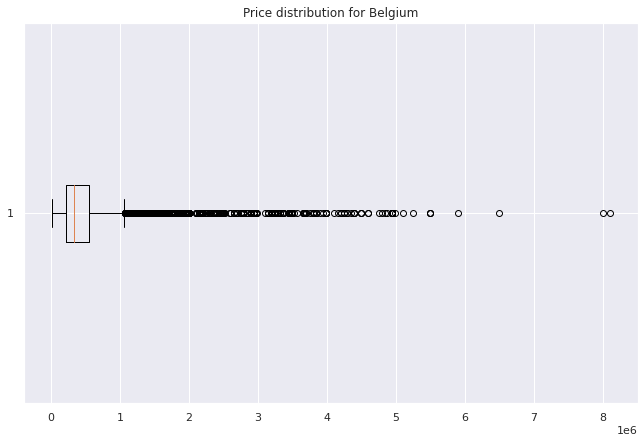

In [324]:
fig, ax = plt.subplots()
ax.boxplot(df["price"], vert=False)
ax.set_title("Price distribution for Belgium")
plt.show()

Text(0.5, 0, 'Price')

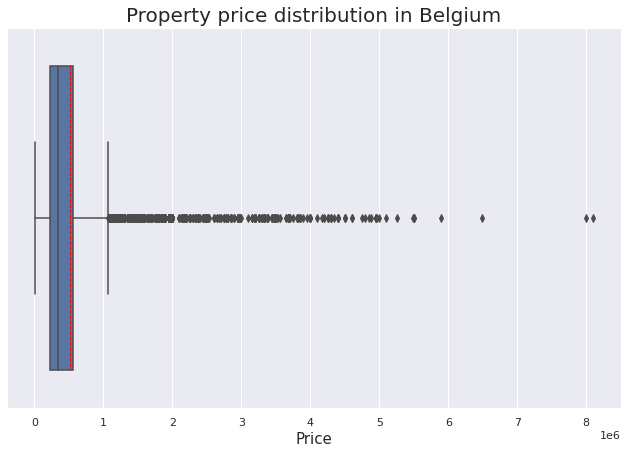

In [334]:
price_belgium_boxplot = sns.boxplot(x=df["price"], orient="h", showfliers=True, 
showmeans=True, meanline=True, meanprops={"color":"red"})
price_belgium_boxplot.axes.set_title("Property price distribution in Belgium", fontsize=20)
price_belgium_boxplot.set_xlabel("Price", fontsize=15)


Text(0.5, 0, 'Price/m2')

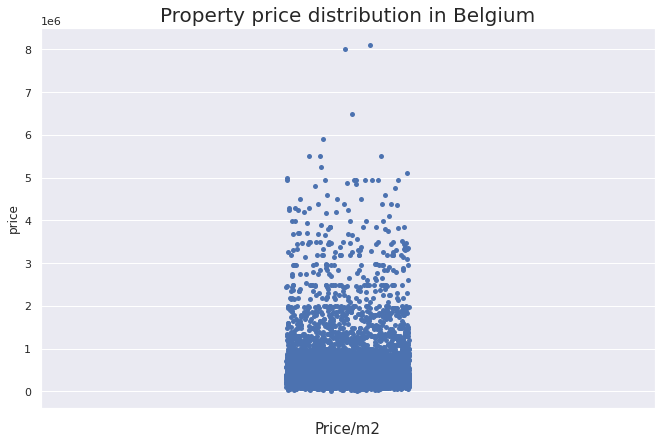

In [339]:
price_belgium_stripplot = sns.stripplot(data=df, y="price", orient='v')
price_belgium_stripplot.axes.set_title("Property price distribution in Belgium", fontsize=20)
price_belgium_stripplot.set_xlabel("Price/m2", fontsize=15)

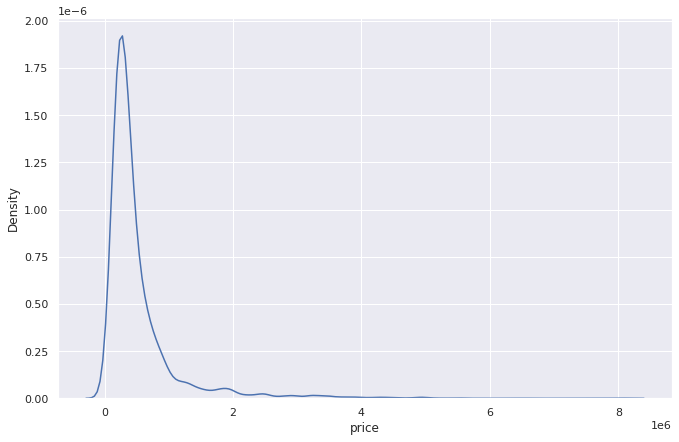

In [341]:
price_belgium_curve = sns.kdeplot(data=df, x="price")

In [345]:
# calculate outliers
outliers = df[df['price'] > df['price'].mean() + 3 * df['price'].std()]
outliers

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
76,1000,HOUSE,APARTMENT_BLOCK,2498000.0,1900.0,AS_NEW,Regular,7.0,570.0,USA_SEMI_EQUIPPED,...,True,145.0,314.0,2.0,False,1,1,3,0,4382.456140
214,1640,HOUSE,VILLA,2750000.0,1962.0,AS_NEW,Regular,5.0,480.0,HYPER_EQUIPPED,...,NaN,NaN,4539.0,4.0,NaN,1,0,3,0,5729.166667
215,2930,HOUSE,VILLA,3250000.0,1936.0,GOOD,Regular,5.0,577.0,HYPER_EQUIPPED,...,True,8500.0,10431.0,4.0,True,1,1,2,1,5632.582322
438,1380,HOUSE,EXCEPTIONAL_PROPERTY,2475000.0,2007.0,AS_NEW,Regular,6.0,764.0,USA_HYPER_EQUIPPED,...,True,10000.0,12901.0,4.0,True,1,0,3,1,3239.528796
439,1050,HOUSE,APARTMENT_BLOCK,3200000.0,1900.0,GOOD,Regular,1.0,1350.0,INSTALLED,...,NaN,NaN,490.0,2.0,False,1,0,2,0,2370.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,1160,APARTMENT,APARTMENT,6490000.0,2020.0,AS_NEW,Regular,4.0,625.0,HYPER_EQUIPPED,...,NaN,NaN,NaN,4.0,NaN,1,0,3,0,10384.000000
10111,8300,APARTMENT,APARTMENT,2490000.0,1976.0,NaN,Regular,4.0,130.0,NaN,...,NaN,NaN,NaN,2.0,NaN,0,0,1,0,19153.846154
10273,1050,APARTMENT,APARTMENT,3370000.0,2018.0,JUST_RENOVATED,Regular,3.0,271.0,NaN,...,NaN,NaN,NaN,NaN,False,0,0,2,0,12435.424354
10480,8400,APARTMENT,APARTMENT,2500000.0,NaN,JUST_RENOVATED,Regular,2.0,417.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,2,0,5995.203837


Text(74.59375, 0.5, 'Properties data')

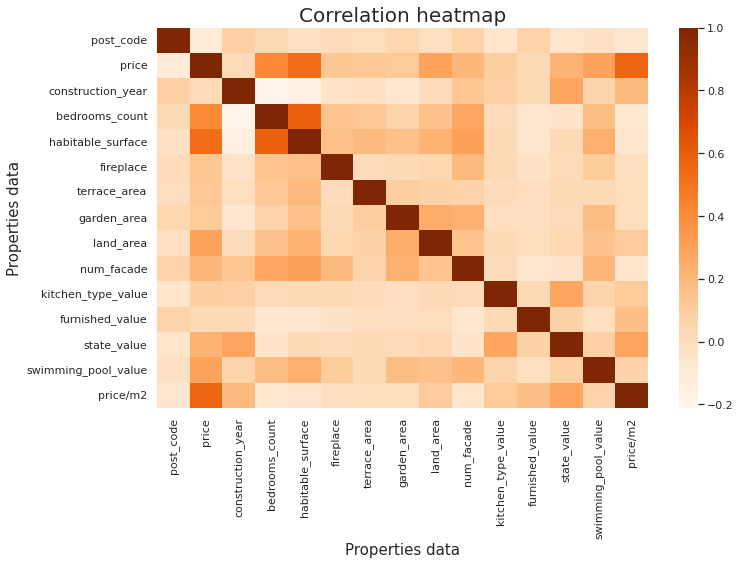

In [182]:
# What is the correlation between the variables and the price? (Why might that be?)
sns.set(rc={'figure.figsize':(11,7)})

heatmap = sns.heatmap(df.corr(), cmap="Oranges")
heatmap.axes.set_title("Correlation heatmap", fontsize=20)
heatmap.set_xlabel("Properties data", fontsize=15)
heatmap.set_ylabel("Properties data", fontsize=15)

### Grouping by municipality, region and province

In [60]:
# filter out elements where price/m2 is 0 due to null surface_area
df_price_m2 = df[df['price/m2'] > 0]
df_price_m2.shape

(8060, 24)

In [116]:
# by municipality
group_by_post_code = df_price_m2.groupby('post_code')
# average price
avg_price_by_post_code = group_by_post_code['price'].mean()
least_expensive_avg_price_by_post_code = avg_price_by_post_code.sort_values().head(10)
most_expensive_avg_price_by_post_code = avg_price_by_post_code.sort_values().tail(10)
# median price
median_price_by_post_code = group_by_post_code['price'].median()
least_expensive_median_price_by_post_code = median_price_by_post_code.sort_values().head(10)
most_expensive_median_price_by_post_code = median_price_by_post_code.sort_values().tail(10)
# average price/m2
avg_pricem2_by_post_code = group_by_post_code['price/m2'].mean()
least_expensive_avg_pricem2_by_post_code = avg_pricem2_by_post_code.sort_values().head(10)
most_expensive_avg_pricem2_by_post_code = avg_pricem2_by_post_code.sort_values().tail(10)
# median price/m2
median_pricem2_by_post_code = group_by_post_code['price/m2'].median()
least_expensive_median_pricem2_by_post_code = median_pricem2_by_post_code.sort_values().head(10)
most_expensive_median_pricem2_by_post_code = median_pricem2_by_post_code.sort_values().tail(10)


### Plotting the most expensive municipalities

In [253]:
most_expensive_avg_price_by_post_code

post_code
8377    1.350000e+06
1380    1.377615e+06
9250    1.444167e+06
7750    1.450000e+06
1640    1.450838e+06
2240    1.495000e+06
8300    1.639170e+06
2360    1.907000e+06
3080    2.180133e+06
9111    3.750000e+06
Name: price, dtype: float64

In [288]:
# Nbr of post_codes in our dataset (Belgium has 2758 postal codes in total according to the Wallonia website)
len(df_price_m2['post_code'].unique())

744

/tmp/ipykernel_5354/4294846028.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_5354/4294846028.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


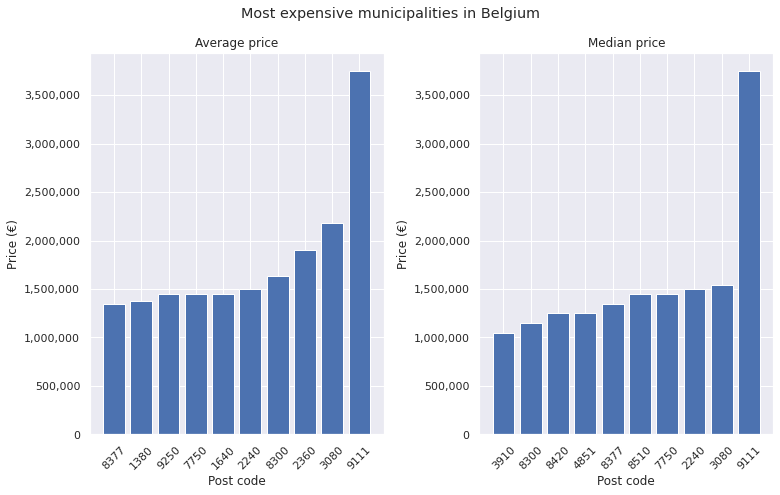

In [299]:
fig, ax = plt.subplots(1,2)
ax[0].bar(list(map(str, most_expensive_avg_price_by_post_code.index)), most_expensive_avg_price_by_post_code.values)
ax[1].bar(list(map(str, most_expensive_median_price_by_post_code.index)), most_expensive_median_price_by_post_code.values)
ax[0].set_title("Average price")
ax[1].set_title("Median price")
ax[0].set_xlabel("Post code")
ax[1].set_xlabel("Post code")
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Price (€)")
ax[1].set_ylabel("Price (€)")

# after plotting the data, format the labels
current_values = ax[0].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# after plotting the data, format the labels
current_values = ax[1].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

fig.suptitle("Most expensive municipalities in Belgium")
fig.tight_layout()
plt.show()

/tmp/ipykernel_5354/2783363031.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_5354/2783363031.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


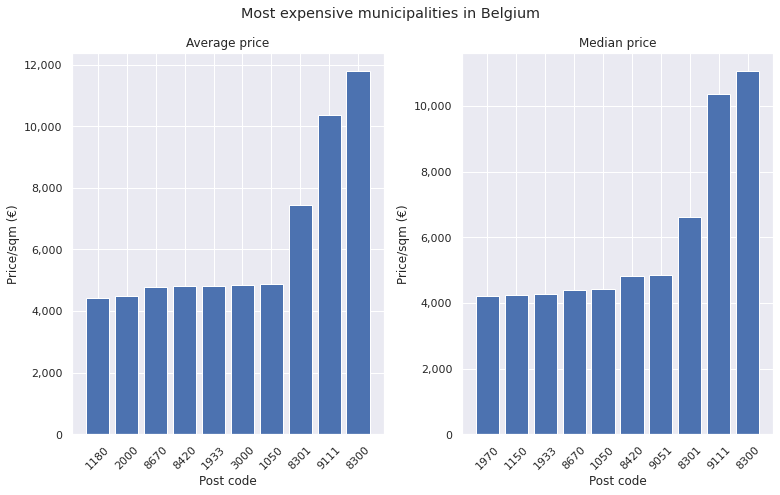

In [300]:
fig, ax = plt.subplots(1,2)
ax[0].bar(list(map(str, most_expensive_avg_pricem2_by_post_code.index)), most_expensive_avg_pricem2_by_post_code.values)
ax[1].bar(list(map(str, most_expensive_median_pricem2_by_post_code.index)), most_expensive_median_pricem2_by_post_code.values)
ax[0].set_title("Average price")
ax[1].set_title("Median price")
ax[0].set_xlabel("Post code")
ax[1].set_xlabel("Post code")
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Price/sqm (€)")
ax[1].set_ylabel("Price/sqm (€)")

# after plotting the data, format the labels
current_values = ax[0].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# after plotting the data, format the labels
current_values = ax[1].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

fig.suptitle("Most expensive municipalities in Belgium")
fig.tight_layout()
plt.show()

### Plotting the least expensive municipalities in Belgium

/tmp/ipykernel_5354/132692316.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_5354/132692316.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


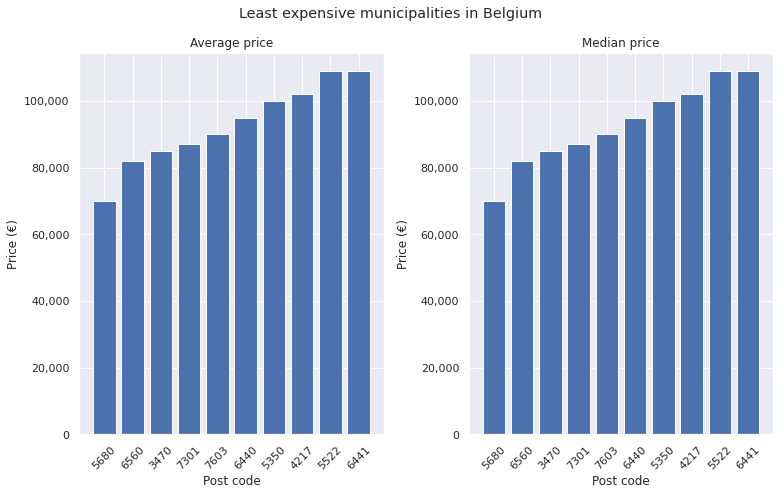

In [310]:
fig, ax = plt.subplots(1,2)
ax[0].bar(list(map(str, least_expensive_avg_price_by_post_code.index)), least_expensive_avg_price_by_post_code.values)
ax[1].bar(list(map(str, least_expensive_median_price_by_post_code.index)), least_expensive_median_price_by_post_code.values)
ax[0].set_title("Average price")
ax[1].set_title("Median price")
ax[0].set_xlabel("Post code")
ax[1].set_xlabel("Post code")
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Price (€)")
ax[1].set_ylabel("Price (€)")

# after plotting the data, format the labels
current_values = ax[0].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# after plotting the data, format the labels
current_values = ax[1].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

fig.suptitle("Least expensive municipalities in Belgium")
fig.tight_layout()
plt.show()

In [311]:
df_price_m2.loc[df_price_m2["post_code"] == 6441]

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2,Province
10422,6441,APARTMENT,APARTMENT,109000.0,NaN,AS_NEW,Regular,1.0,44.0,INSTALLED,...,NaN,NaN,4.0,True,1,0,3,1,2477.272727,Hainaut


/tmp/ipykernel_5354/4088020142.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_5354/4088020142.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


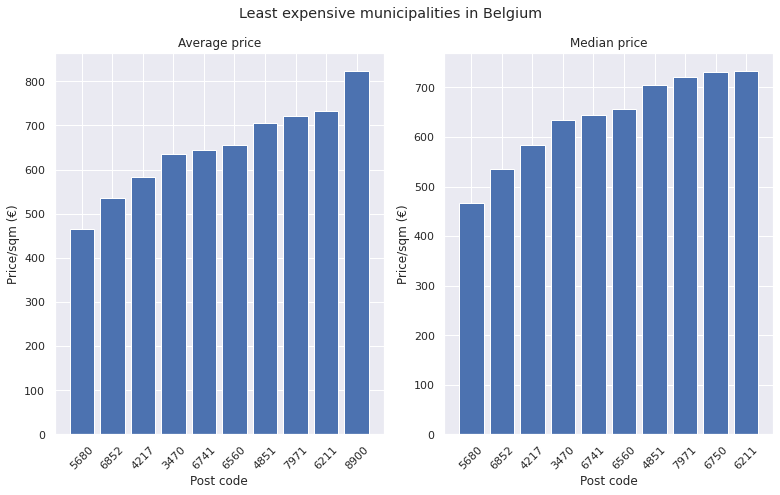

In [312]:
fig, ax = plt.subplots(1,2)
ax[0].bar(list(map(str, least_expensive_avg_pricem2_by_post_code.index)), least_expensive_avg_pricem2_by_post_code.values)
ax[1].bar(list(map(str, least_expensive_median_pricem2_by_post_code.index)), least_expensive_median_pricem2_by_post_code.values)
ax[0].set_title("Average price")
ax[1].set_title("Median price")
ax[0].set_xlabel("Post code")
ax[1].set_xlabel("Post code")
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Price/sqm (€)")
ax[1].set_ylabel("Price/sqm (€)")

# after plotting the data, format the labels
current_values = ax[0].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# after plotting the data, format the labels
current_values = ax[1].get_yticks()
# using format string '{:.0f}' here but you can choose others
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

fig.suptitle("Least expensive municipalities in Belgium")
fig.tight_layout()
plt.show()

In [313]:
df_price_m2.loc[df_price_m2["post_code"] == 8900]

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2,Province
1315,8900,HOUSE,MIXED_USE_BUILDING,350000.0,1925.0,TO_RENOVATE,Regular,4.0,425.0,NOT_INSTALLED,...,80.0,237.0,2.0,False,0,0,0,0,823.529412,Flandre-Occidentale


## Provinces

In [171]:
# by province
def determine_province_based_on_post_code(row):
    # 1000–1299 : Région de Bruxelles-Capitale
    if row["post_code"] >= 1000 and row["post_code"] <= 1299:
        return "RBC"
    # 1300–1499 : Brabant wallon
    if row["post_code"] >= 1300 and row["post_code"] <= 1499:
        return "Brabant wallon"
    # 1500–1999 and 3000–3499: Brabant flamand
    elif (row["post_code"] >= 1500 and row["post_code"] <= 1999) or (row["post_code"] >= 3000 and row["post_code"] <= 3499):
        return "Brabant flamand" 
    # 2000–2999 : Anvers
    elif row["post_code"] >= 2000 and row["post_code"] <= 2999:
        return "Anvers"
    # 3500–3999 : Limbourg
    elif row["post_code"] >= 3500 and row["post_code"] <= 3999:
        return "Limbourg"
    # 4000–4999 : Liège
    elif row["post_code"] >= 4000 and row["post_code"] <= 4999:
        return "Liège"
    # 5000–5680 : Namur
    elif row["post_code"] >= 5000 and row["post_code"] <= 5680:
        return "Namur"
    # 6000–6599 and 7000–7999 : Hainaut
    elif (row["post_code"] >= 6000 and row["post_code"] <= 6599) or (row["post_code"] >= 7000 and row["post_code"] <= 7999):
        return "Hainaut" 
    # 6600–6999 : Luxembourg
    elif row["post_code"] >= 6600 and row["post_code"] <= 6999:
        return "Luxembourg"
    # 8000–8999 : Flandre-Occidentale
    elif row["post_code"] >= 8000 and row["post_code"] <= 8999:
        return "Flandre-Occidentale"
    # 9000–9999 : Flandre-Orientale
    elif row["post_code"] >= 9000 and row["post_code"] <= 9999:
        return "Flandre-Orientale"
    else:
        return "Error"


In [172]:
df_price_m2["Province"] = df.apply(lambda row: determine_province_based_on_post_code(row), axis=1)

In [174]:
# to check if no errors
df_price_m2["Province"].unique()

array(['Namur', 'Liège', 'Flandre-Orientale', 'RBC', 'Brabant flamand',
       'Brabant wallon', 'Flandre-Occidentale', 'Anvers', 'Luxembourg',
       'Hainaut', 'Limbourg'], dtype=object)

In [175]:
group_by_province = df_price_m2.groupby('Province')
# average price
avg_price_by_province = group_by_province['price'].mean()
avg_price_by_province.sort_values()

# median price
median_price_by_province = group_by_province['price'].median()
median_price_by_province.sort_values()

# average price/m2
avg_pricem2_by_province = group_by_province['price/m2'].mean()
avg_pricem2_by_province.sort_values()

# median price/m2
median_pricem2_by_province = group_by_province['price/m2'].median()
median_pricem2_by_province.sort_values()

Province
Hainaut                1517.675983
Liège                  1656.050955
Luxembourg             1714.285714
Namur                  1828.703704
Limbourg               2117.647059
Flandre-Orientale      2211.111111
Brabant flamand        2682.795699
Anvers                 2746.063218
Brabant wallon         2775.000000
RBC                    3611.111111
Flandre-Occidentale    4031.250000
Name: price/m2, dtype: float64

Text(0, 0.5, 'Price')

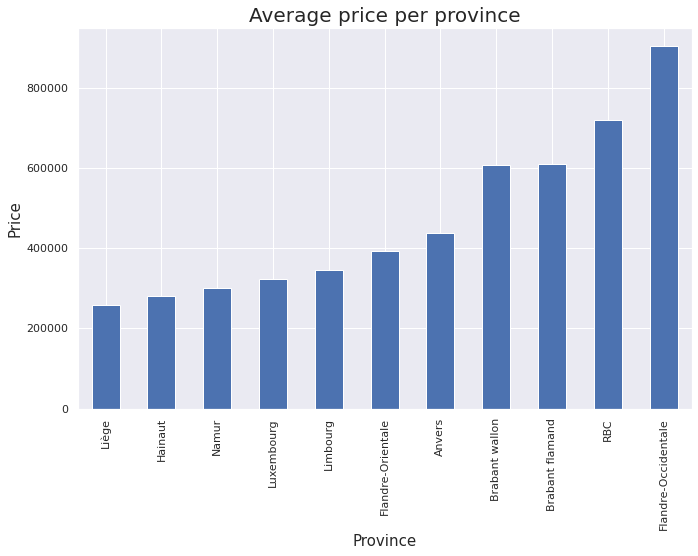

In [176]:
plot_province_1 = avg_price_by_province.sort_values().plot.bar()
plot_province_1.axes.set_title("Average price per province", fontsize=20)
plot_province_1.set_xlabel("Province", fontsize=15)
plot_province_1.set_ylabel("Price", fontsize=15)

Text(0, 0.5, 'Price')

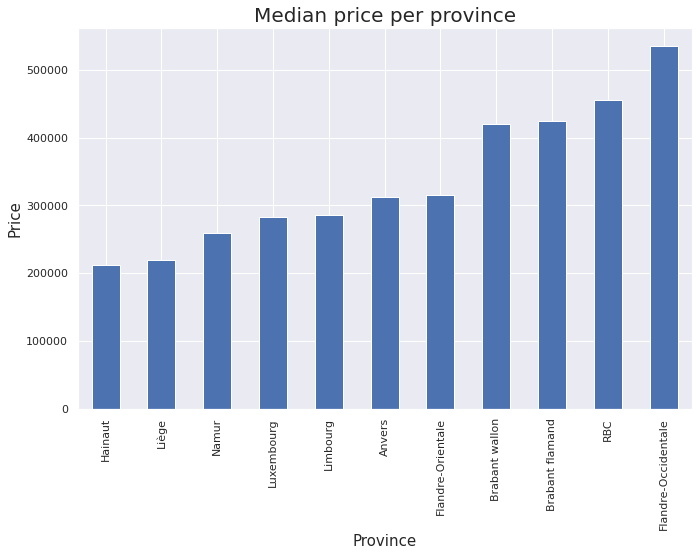

In [177]:
plot_province_2 = median_price_by_province.sort_values().plot.bar()
plot_province_2.axes.set_title("Median price per province", fontsize=20)
plot_province_2.set_xlabel("Province", fontsize=15)
plot_province_2.set_ylabel("Price", fontsize=15)

In [219]:
group_by_province['price/m2'].describe()

,count,mean,std,min,25%,50%,75%,max
Province,,,,,,,,
Anvers,948.0,2922.962367,1154.562609,386.544087,2220.424837,2746.063218,3409.090909,13223.140496
Brabant flamand,817.0,2928.266344,1266.245855,595.238095,2157.534247,2682.795699,3489.583333,12730.627306
Brabant wallon,620.0,2861.986759,1065.792227,221.562809,2194.302721,2775.000000,3353.851497,10000.000000
Flandre-Occidentale,607.0,6457.976790,5629.752913,550.000000,2240.001329,4031.250000,9636.243386,32094.594595
Flandre-Orientale,713.0,2394.566132,1124.625046,38.045553,1666.666667,2211.111111,2836.206897,10359.116022
Hainaut,682.0,1612.135948,674.845066,200.000000,1094.616788,1517.675983,2039.970930,5322.631579
Limbourg,109.0,2202.515037,844.058581,595.567867,1770.833333,2117.647059,2620.901639,6391.752577
Liège,923.0,1739.683502,750.154956,68.493151,1224.572650,1656.050955,2130.200861,6097.562500
Luxembourg,258.0,1786.997746,757.753775,300.000000,1264.464561,1714.285714,2239.436620,3676.470588


Boxplots will show us the distribution of price/m2 per province.
- 1) and 2) with and without outliers show that Flandre Occidentale is by far the most expensive municipality
- 3) and 4) without outliers show that splitting between houses and apartments will make Flandre Occidentale almost at the same level as RBC if we are talking about houses. Meaning that appartments are very expensive at the Coast, namely at the municipality of Knokke. Average line also confirm this.

Text(0, 0.5, 'Province')

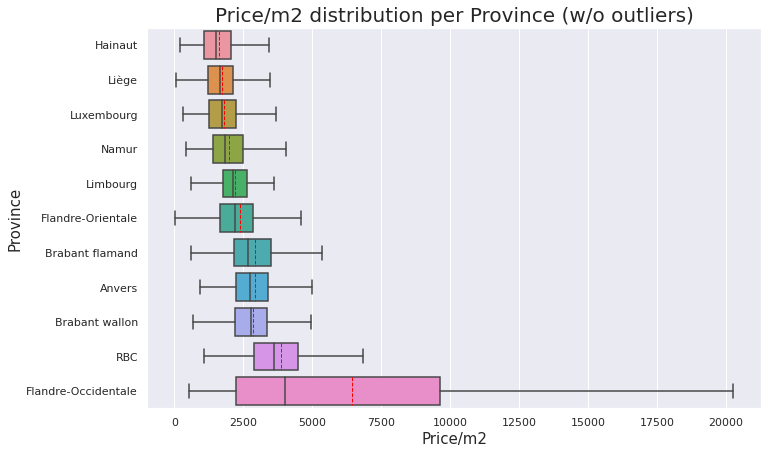

In [220]:
ordered_provinces = group_by_province['price/m2'].median().sort_values().index.to_list()
ordered_provinces

province_boxplot = sns.boxplot(y="Province", x="price/m2", data=df_price_m2, orient="h", order=ordered_provinces,
showfliers=False, showmeans=True, meanline=True, meanprops={"color":"red"})
province_boxplot.axes.set_title("Price/m2 distribution per Province (w/o outliers)", fontsize=20)
province_boxplot.set_xlabel("Price/m2", fontsize=15)
province_boxplot.set_ylabel("Province", fontsize=15)

Text(0, 0.5, 'Province')

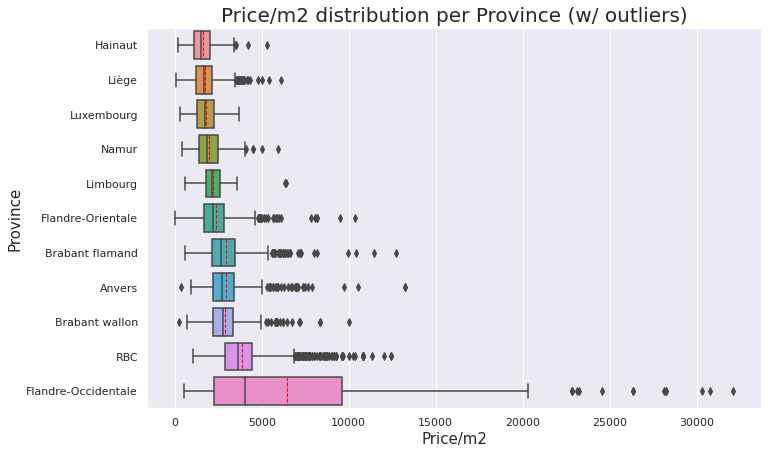

In [221]:
province_boxplot = sns.boxplot(y="Province", x="price/m2", data=df_price_m2, orient="h", order=ordered_provinces,
showfliers=True, showmeans=True, meanline=True, meanprops={"color":"red"})
province_boxplot.axes.set_title("Price/m2 distribution per Province (w/ outliers)", fontsize=20)
province_boxplot.set_xlabel("Price/m2", fontsize=15)
province_boxplot.set_ylabel("Province", fontsize=15)

In [241]:
prov = group_by_province['price/m2'].median().sort_values()
highest_median = prov.to_list().pop()
highest_median
df_pricem2_bigger_than_highest_province_median = df_price_m2.loc[df_price_m2["price/m2"] > highest_median].sort_values(by=['price'])
df_pricem2_bigger_than_highest_province_median.describe()

,post_code,price,construction_year,bedrooms_count,habitable_surface,terrace_area,garden_area,land_area,num_facade,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
count,1396.000000,1.396000e+03,1158.000000,1396.000000,1396.000000,809.000000,254.000000,351.000000,1148.000000,1396.000000,1396.00000,1396.000000,1396.000000,1396.000000
mean,3197.471347,1.176768e+06,1981.159758,2.780802,186.709169,43.358467,1095.905512,4483.524217,2.648955,0.863181,0.09384,2.347421,0.065903,6462.109376
std,3131.686242,1.091065e+06,37.333363,1.581462,167.011969,216.072240,3095.404284,27677.847739,0.854512,0.343780,0.29171,0.821093,0.248201,3551.953885
min,1000.000000,9.756100e+04,1780.000000,0.000000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,4032.258065
25%,1050.000000,4.250000e+05,1960.250000,2.000000,82.000000,9.000000,100.000000,275.500000,2.000000,1.000000,0.00000,2.000000,0.000000,4416.666667
50%,1180.000000,7.700000e+05,1989.000000,3.000000,130.000000,20.000000,300.500000,798.000000,2.000000,1.000000,0.00000,3.000000,0.000000,5063.573022
75%,8300.000000,1.575000e+06,2015.000000,3.000000,225.250000,45.000000,856.750000,2402.500000,3.000000,1.000000,0.00000,3.000000,0.000000,6935.416667
max,9930.000000,8.100000e+06,2022.000000,12.000000,1200.000000,6055.000000,42000.000000,500000.000000,4.000000,1.000000,1.00000,3.000000,1.000000,32094.594595


Text(0, 0.5, 'Province')

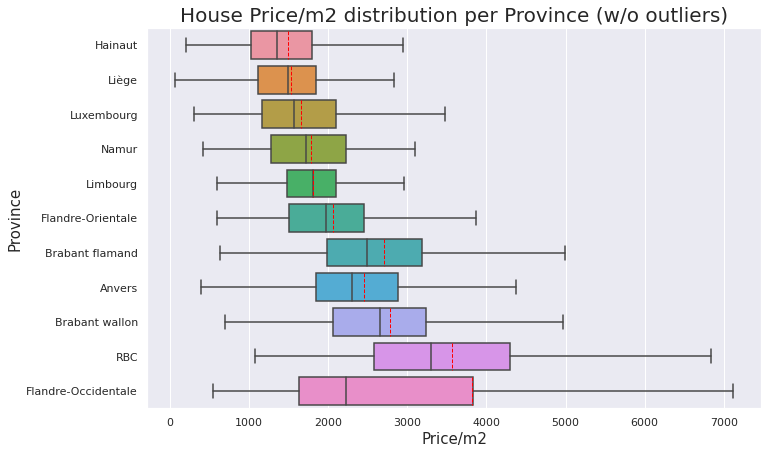

In [247]:
province_boxplot = sns.boxplot(y="Province", x="price/m2", data=df_price_m2[df_price_m2['type_of_property'] == 'HOUSE'], orient="h", order=ordered_provinces,
showfliers=False, showmeans=True, meanline=True, meanprops={"color":"red"})
province_boxplot.axes.set_title("House Price/m2 distribution per Province (w/o outliers)", fontsize=20)
province_boxplot.set_xlabel("Price/m2", fontsize=15)
province_boxplot.set_ylabel("Province", fontsize=15)

Text(0, 0.5, 'Province')

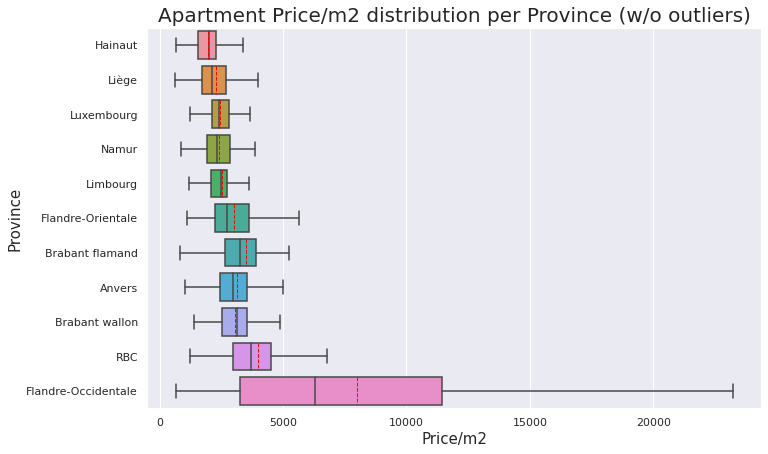

In [246]:
province_boxplot = sns.boxplot(y="Province", x="price/m2", data=df_price_m2[df_price_m2['type_of_property'] == 'APARTMENT'], orient="h", order=ordered_provinces,
showfliers=False, showmeans=True, meanline=True, meanprops={"color":"red"})
province_boxplot.axes.set_title("Apartment Price/m2 distribution per Province (w/o outliers)", fontsize=20)
province_boxplot.set_xlabel("Price/m2", fontsize=15)
province_boxplot.set_ylabel("Province", fontsize=15)

-----

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_area,num_facade,swimmingpool
32,1000,APARTMENT,APARTMENT,465000.0,1914.0,AS_NEW,Regular,2.0,138.0,HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN
36,1000,APARTMENT,APARTMENT,395000.0,1914.0,AS_NEW,Regular,2.0,80.0,HYPER_EQUIPPED,True,False,True,14.0,True,40.0,NaN,2.0,NaN
37,1000,APARTMENT,APARTMENT,465000.0,1974.0,GOOD,Regular,3.0,115.0,NaN,NaN,False,True,9.0,NaN,NaN,NaN,2.0,NaN
70,1000,APARTMENT,APARTMENT,465000.0,1914.0,AS_NEW,Regular,2.0,138.0,HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN
74,1000,APARTMENT,APARTMENT,395000.0,1914.0,AS_NEW,Regular,2.0,80.0,HYPER_EQUIPPED,True,False,True,14.0,True,40.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11237,1000,APARTMENT,APARTMENT,465000.0,1914.0,AS_NEW,Regular,2.0,138.0,HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN
11251,1000,APARTMENT,APARTMENT,275000.0,2012.0,AS_NEW,Regular,1.0,62.0,USA_HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,3.0,NaN
11263,1000,APARTMENT,APARTMENT,285000.0,1890.0,AS_NEW,Regular,1.0,65.0,HYPER_EQUIPPED,False,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN
11275,1000,APARTMENT,APARTMENT,465000.0,1914.0,AS_NEW,Regular,2.0,138.0,HYPER_EQUIPPED,True,False,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [154]:
df['price'].min()

85000.0

In [162]:
#df.loc[df['habitable_surface'].isnull()]

test = df.loc[df['post_code'] == 8300]
test.describe()

,post_code,price,construction_year,bedrooms_count,habitable_surface,terrace_area,garden_area,land_area,num_facade,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
count,4.0,4.000000e+00,4.000000,4.00,4.000000,1.0,0.0,0.0,4.00,4.0,4.00,4.00000,4.0,4.000000
mean,8300.0,1.086125e+06,1978.000000,2.25,99.250000,16.0,NaN,NaN,2.25,1.0,0.25,2.50000,0.0,11049.418290
std,0.0,5.034399e+05,14.764823,0.50,16.560495,NaN,NaN,NaN,0.50,0.0,0.50,0.57735,0.0,4840.493041
min,8300.0,6.750000e+05,1958.000000,2.00,84.000000,16.0,NaN,NaN,2.00,1.0,0.00,2.00000,0.0,6245.833333
25%,8300.0,7.308750e+05,1971.500000,2.00,87.000000,16.0,NaN,NaN,2.00,1.0,0.00,2.00000,0.0,7588.244048
50%,8300.0,9.472500e+05,1981.500000,2.00,96.500000,16.0,NaN,NaN,2.00,1.0,0.00,2.50000,0.0,10523.538961
75%,8300.0,1.302500e+06,1988.000000,2.25,108.750000,16.0,NaN,NaN,2.25,1.0,0.25,3.00000,0.0,13984.713203
max,8300.0,1.775000e+06,1991.000000,3.00,120.000000,16.0,NaN,NaN,3.00,1.0,1.00,3.00000,0.0,16904.761905


In [57]:
group_by_post_code = df.groupby(['post_code'])
group_by_post_code['price/m2'].describe()

,count,mean,std,min,25%,50%,75%,max
post_code,,,,,,,,
1000,290.0,4213.780416,1812.962672,0.0,3171.052632,3997.500000,4745.436105,10809.836066
1020,79.0,2753.964380,845.195860,0.0,2275.961538,2750.000000,3143.284859,5863.636364
1030,137.0,3033.470908,1024.142725,0.0,2586.363636,3125.000000,3600.000000,5000.000000
1040,102.0,3614.694036,1403.698607,0.0,3150.883838,3662.500000,4271.853147,7875.354108
1050,306.0,4608.503286,2160.204236,0.0,3637.868754,4314.583333,5538.768116,12435.424354
...,...,...,...,...,...,...,...,...
9950,6.0,341.666667,836.908995,0.0,0.000000,0.000000,0.000000,2050.000000
9968,1.0,3112.500000,NaN,3112.5,3112.500000,3112.500000,3112.500000,3112.500000
9971,2.0,1707.077815,63.042550,1662.5,1684.788907,1707.077815,1729.366722,1751.655629


In [111]:
df.loc['state' == 'nan']

KeyError: 'False: boolean label can not be used without a boolean index'

In [86]:
df.loc[df['subtype'] == "MANSION"]

,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_area,num_facade,swimmingpool
137,9600,HOUSE,MANSION,279000.0,1945.0,JUST_RENOVATED,Regular,5.0,258.0,INSTALLED,False,False,True,29.0,NaN,NaN,156.0,2.0,False


In [87]:
df1 = df.groupby(['type_of_property','subtype'])
df1.count()

post_code  price  construction_year  \
type_of_property subtype                                                   
APARTMENT        APARTMENT                 100    100                 92   
                 DUPLEX                     10     10                 10   
                 FLAT_STUDIO                 5      5                  4   
                 PENTHOUSE                   6      6                  6   
                 SERVICE_FLAT                9      9                  9   
APARTMENT_GROUP  APARTMENT_GROUP             6      0                  0   
HOUSE            APARTMENT_BLOCK             8      8                  8   
                 BUNGALOW                    8      8                  8   
                 COUNTRY_COTTAGE             1      1                  1   
                 FARMHOUSE                   1      1                  1   
                 HOUSE                     115    115                 99   
                 MANSION                     1      1                  1   
                 MIXED_USE_BUILDING          5      5                  5   
                 OTHER_PROPERTY              1      1                  1   
                 TOWN_HOUSE                  2      2                  2   
                 VILLA                      24     24                 24   
HOUSE_GROUP      HOUSE_GROUP                 2      0                  0   

                                     state  type_of_sale  bedrooms_count  \
type_of_property subtype                                                   
APARTMENT        APARTMENT              92           100             100   
                 DUPLEX                 10            10              10   
                 FLAT_STUDIO             5             5               5   
                 PENTHOUSE               6             6               6   
                 SERVICE_FLAT            9             9               9   
APARTMENT_GROUP  APARTMENT_GROUP         0             6               0   
HOUSE            APARTMENT_BLOCK         8             8               8   
                 BUNGALOW                8             8               8   
                 COUNTRY_COTTAGE         1             1               1   
                 FARMHOUSE               1             1               1   
                 HOUSE                 115           115             115   
                 MANSION                 1             1               1   
                 MIXED_USE_BUILDING      5             5               5   
                 OTHER_PROPERTY          1             1               1   
                 TOWN_HOUSE              2             2               2   
                 VILLA                  24            24              24   
HOUSE_GROUP      HOUSE_GROUP             0             2               0   

                                     habitable_surface  kitchen_type  \
type_of_property subtype                                               
APARTMENT        APARTMENT                         100           100   
                 DUPLEX                             10             9   
                 FLAT_STUDIO                         5             5   
                 PENTHOUSE                           6             6   
                 SERVICE_FLAT                        8             9   
APARTMENT_GROUP  APARTMENT_GROUP                     0             0   
HOUSE            APARTMENT_BLOCK                     8             8   
                 BUNGALOW                            8             8   
                 COUNTRY_COTTAGE                     1             1   
                 FARMHOUSE                           1             1   
                 HOUSE                             107            98   
                 MANSION                             1             1   
                 MIXED_USE_BUILDING                  5             5   
                 OTHER_PROPERTY                      1             

In [88]:
df['furnished'].fillna('None')

0      False
1      False
2       None
3      False
4      False
       ...  
299    False
300    False
301    False
302    False
303    False
Name: furnished, Length: 304, dtype: object

In [99]:
for item in df['kitchen_type'].unique():
    print(type(item))
    print(str(item))

<class 'str'>
SEMI_EQUIPPED
<class 'str'>
USA_INSTALLED
<class 'str'>
INSTALLED
<class 'str'>
HYPER_EQUIPPED
<class 'str'>
NOT_INSTALLED
<class 'float'>
nan
<class 'str'>
USA_HYPER_EQUIPPED
<class 'str'>
USA_SEMI_EQUIPPED
<class 'str'>
USA_UNINSTALLED


In [100]:
def determine_kitchen_type_value(row):
    if row['kitchen_type'] == "NOT_INSTALLED" or row['kitchen_type'] == "USA_UNINSTALLED" or str(row['kitchen_type'])== "nan":
        return 0
    else:
        return 1


In [123]:
def determine_furnished_value(row):
    if str(row['furnished']) == "False" or str(row['furnished'])== "nan":
        return 0
    else:
        return 1

In [120]:
def determine_swimming_pool_value(row):
    if str(row['swimmingpool']) == "False" or str(row['swimmingpool'])== "nan":
        return 0
    else:
        return 1

In [112]:
def determine_state_value(row):
    if row['state'] == "TO_RENOVATE" or row['state'] == "TO_RESTORE":
        return 0
    elif row['state'] == "TO_BE_DONE_UP" or str(row['state']) == "nan":
        return 1
    elif row['state'] == "GOOD" or row['state'] == "JUST_RENOVATED":
        return 2
    else:
        return 3
"""
- state -> 'AS_NEW': 3,
        'JUST_RENOVATED': 2,
        'GOOD': 2,
        'TO_BE_DONE_UP':1,
        nan:1,
        'TO_RENOVATE': 0,
       'TO_RESTORE':0
       """

"\n- state -> 'AS_NEW': 3,\n        'JUST_RENOVATED': 2,\n        'GOOD': 2,\n        'TO_BE_DONE_UP':1,\n        nan:1,\n        'TO_RENOVATE': 0,\n       'TO_RESTORE':0\n       "

In [144]:
# When the data is clean price == 0 will be droped and this method should be adapted accordingly
def price_per_square_meter(row):
    if str(row['price']) == "nan" or str(row['habitable_surface']) == "nan":
        return 0
    else :
        return row['price'] / row['habitable_surface']

In [145]:
df["kitchen_type_value"] = df.apply(lambda row: determine_kitchen_type_value(row), axis=1)
df['furnished_value'] = df.apply(lambda row: determine_furnished_value(row), axis=1)
df['state_value'] = df.apply(lambda row: determine_state_value(row), axis=1)
df['swimming_pool_value'] = df.apply(lambda row: determine_swimming_pool_value(row), axis=1)
df["price/m2"] = df.apply(lambda row: price_per_square_meter(row), axis=1)

In [146]:
df


,post_code,type_of_property,subtype,price,construction_year,state,type_of_sale,bedrooms_count,habitable_surface,kitchen_type,...,garden,garden_area,land_area,num_facade,swimmingpool,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
0,4430,HOUSE,HOUSE,159000.0,1899.0,GOOD,Regular,2.0,122.0,SEMI_EQUIPPED,...,True,171.0,335.0,2.0,False,1,0,2,0,1303.278689
1,9000,HOUSE,HOUSE,345000.0,1941.0,GOOD,Regular,4.0,119.0,USA_INSTALLED,...,NaN,NaN,49.0,2.0,False,1,0,2,0,2899.159664
2,1150,HOUSE,VILLA,895000.0,1961.0,TO_RENOVATE,Regular,3.0,200.0,INSTALLED,...,True,200.0,300.0,3.0,False,1,0,0,0,4475.000000
3,1570,HOUSE,VILLA,570000.0,1989.0,AS_NEW,Regular,4.0,404.0,HYPER_EQUIPPED,...,True,1000.0,1000.0,4.0,False,1,0,3,0,1410.891089
4,4052,HOUSE,COUNTRY_COTTAGE,325000.0,1900.0,TO_RENOVATE,Regular,4.0,180.0,NOT_INSTALLED,...,True,380.0,555.0,4.0,False,0,0,0,0,1805.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,9300,HOUSE,HOUSE,185000.0,1940.0,TO_RENOVATE,Regular,4.0,155.0,SEMI_EQUIPPED,...,True,80.0,145.0,2.0,NaN,1,0,0,0,1193.548387
300,1070,APARTMENT,APARTMENT,220000.0,NaN,NaN,Regular,2.0,85.0,SEMI_EQUIPPED,...,NaN,NaN,NaN,NaN,False,1,0,1,0,2588.235294
301,2220,HOUSE,HOUSE,410000.0,1947.0,GOOD,Regular,3.0,194.0,NaN,...,NaN,NaN,897.0,4.0,False,0,0,2,0,2113.402062
302,7802,HOUSE,HOUSE,120500.0,NaN,TO_RENOVATE,Regular,2.0,120.0,SEMI_EQUIPPED,...,True,NaN,340.0,3.0,NaN,1,0,0,0,1004.166667


In [136]:
df.corr()

,post_code,price,construction_year,bedrooms_count,habitable_surface,fireplace,terrace_area,garden_area,land_area,num_facade,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
post_code,1.000000,-0.254617,-0.038551,-0.010210,-0.011422,-0.015765,-0.051162,-0.198746,-0.101917,-0.119022,-0.065665,0.033124,-0.170578,-0.003769,-0.224537
price,-0.254617,1.000000,0.235812,0.383595,0.591198,0.404101,0.071250,0.317708,0.505981,0.234587,0.155330,0.096686,0.190978,0.058509,0.563992
construction_year,-0.038551,0.235812,1.000000,-0.269838,-0.123394,0.047507,-0.089340,0.149232,0.332235,0.128060,0.380424,-0.001021,0.545202,0.015471,0.437981
bedrooms_count,-0.010210,0.383595,-0.269838,1.000000,0.743313,0.197788,0.207634,0.341233,0.205248,0.279635,-0.032732,-0.046518,-0.177174,0.168058,-0.250805
habitable_surface,-0.011422,0.591198,-0.123394,0.743313,1.000000,0.398450,0.094792,0.365722,0.506745,0.417904,-0.013434,-0.025516,-0.098259,0.116688,-0.192455
fireplace,-0.015765,0.404101,0.047507,0.197788,0.398450,1.000000,0.019003,0.161555,0.491647,0.213281,0.055440,-0.037387,-0.095252,-0.020238,0.042348
terrace_area,-0.051162,0.071250,-0.089340,0.207634,0.094792,0.019003,1.000000,0.020346,0.004107,0.204818,-0.010047,0.001991,-0.008260,-0.012390,-0.018280
garden_area,-0.198746,0.317708,0.149232,0.341233,0.365722,0.161555,0.020346,1.000000,0.980550,0.388712,0.084674,-0.014683,0.093566,0.612957,0.196234
land_area,-0.101917,0.505981,0.332235,0.205248,0.506745,0.491647,0.004107,0.980550,1.000000,0.370247,0.053221,-0.058884,0.108753,0.269437,0.275376
num_facade,-0.119022,0.234587,0.128060,0.279635,0.417904,0.213281,0.204818,0.388712,0.370247,1.000000,0.070829,-0.003823,-0.002270,0.002782,-0.184184


Text(74.59375, 0.5, 'Properties data')

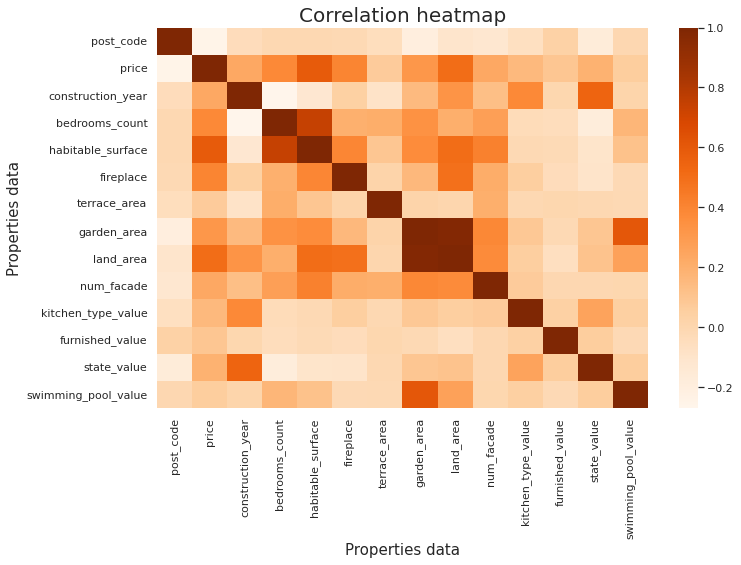

In [127]:
sns.set(rc={'figure.figsize':(11,7)})

heatmap = sns.heatmap(df.corr(), cmap="Oranges")
heatmap.axes.set_title("Correlation heatmap", fontsize=20)
heatmap.set_xlabel("Properties data", fontsize=15)
heatmap.set_ylabel("Properties data", fontsize=15)


In [147]:
df.describe()

,post_code,price,construction_year,bedrooms_count,habitable_surface,terrace_area,garden_area,land_area,num_facade,kitchen_type_value,furnished_value,state_value,swimming_pool_value,price/m2
count,304.000000,2.960000e+02,271.000000,296.000000,287.000000,179.000000,108.000000,166.000000,264.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,3942.092105,4.150232e+05,1958.110701,2.956081,159.038328,33.916201,405.870370,664.819277,2.643939,0.809211,0.032895,1.779605,0.009868,2711.825682
std,3230.812396,3.608684e+05,40.350624,1.433768,101.733619,168.184853,781.981572,886.201853,0.877540,0.393571,0.178655,0.951347,0.099012,1927.984687
min,1000.000000,8.500000e+04,1831.000000,0.000000,32.000000,2.000000,14.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1150.000000,2.200000e+05,1936.000000,2.000000,97.500000,6.000000,80.000000,186.250000,2.000000,1.000000,0.000000,1.000000,0.000000,1411.190514
50%,2210.000000,2.870000e+05,1965.000000,3.000000,124.000000,12.000000,162.000000,384.500000,2.000000,1.000000,0.000000,2.000000,0.000000,2588.235294
75%,7060.000000,4.581500e+05,1980.000000,4.000000,194.000000,25.000000,341.250000,761.000000,3.000000,1.000000,0.000000,2.000000,0.000000,3703.125000
max,9890.000000,2.498000e+06,2022.000000,10.000000,788.000000,2240.000000,5341.000000,5541.000000,4.000000,1.000000,1.000000,3.000000,1.000000,16904.761905


# Notes for later to explain what was done!
- TODO: drop duplicates
- TODO: drop price == nan
- TODO: drop habitable_surface == nan ??
- TODO: count nan per column
- TODO: for 1 post code scatter plot of house OR appart with colour sys for garden, pool, terrace, fireplace, etc... X=surfacehouse, y=price/m2
- TODO: group post codes per province, region, cities/countryside, price/m2, state of property 
- type_of_property -> remove house_group and appartment_group. Keep only (1) house and (2) appartement
- subtype -> just count the nbr of elements for information purposes
- post_code ->
- price ->
- construction_year -> to be used ?
- state -> 'AS_NEW': 3,
        'JUST_RENOVATED': 2,
        'GOOD': 2,
        'TO_BE_DONE_UP':1,
        nan:1,
        'TO_RENOVATE': 0,
       'TO_RESTORE':0
- type_of_sale
- bedrooms_count
- habitable_surface
- kitchen_type -> option 1: boolean , --option 2: increment one number according type of kitchen.-- We choose boolean because it's not clear the difference between kitchen categories. Sometimes a NaN value although there is a kitchen. 0 value for NOT_INSTALLED, USA_UNISTALLED and NaN. 1 otherwise.
- furnished -> boolean : 0 value for False and Nan. 1 otherwise. Because a furnished appartement is a sales argument.
- fireplace
- terrace
- terrace_area
- garden
- garden_area
- land_area
- num_facade
- swimmingpool -> boolean : 0 value for False and Nan. 1 otherwise. Because a swimming pool is a sales argument.
- Convert qualitative to quantitative data
- 

In [4]:
"""
df = df.rename(
    columns={'post_code': 'Locality', 
    'type_of_property': 'Type of property', 
    'subtype': 'Subtype of property',
    'price': 'Price',
    'construction_year': 'Construction year',
    'state': 'State of the building',
    'type_of_sale': 'Type of sale',
    'bedrooms_count': 'Number of rooms',
    'habitable_surface': 'Area',
    'kitchen_type': 'Fully equipped kitchen',
    'furnished': 'Furnished',
    'fireplace': 'Open fire',
    'terrace_area': 'Terrace area',
    'garden_area': 'Garden area',
    'land_area': 'Surface of the land',
    'num_facade': 'Number of facades',
    'swimmingpool': 'Swimming pool'})